In [3]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

model = SVC(gamma='scale')

In [4]:
from sklearn import datasets
digits = datasets.load_digits()
y = digits.target

In [9]:
n_samples = len(digits.data)
X = digits.images.reshape([n_samples, -1])
X.shape, digits.images.shape, digits.data.shape

((1797, 64), (1797, 8, 8), (1797, 64))

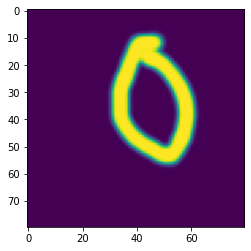

In [14]:
model = SVC(gamma='scale')
model.fit(X, y)

path = '../../../Samples/my-hand-digits/digit0.png'
img = Image.open(path).convert('L')
img = ImageOps.invert(img)
plt.imshow(img)
# plt.imshow(img, cmap='gray')


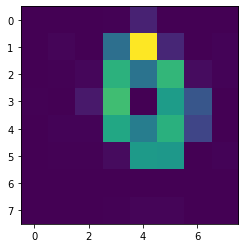

In [16]:
img = img.resize((8,8), resample=Image.ANTIALIAS) # ADJUST ANTI-ALIAS
plt.imshow(img)

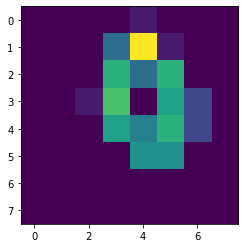

In [40]:
pixel = np.array(img)
pixel = pixel / 255.0  * 16 # rescale 0-255 => 0-16
# pixel = pixel * 16
pixel = pixel.astype('int') # round(0)
# pixel.round(2)
# print(pixel)
plt.imshow(pixel)

In [42]:
my_digit = pixel.reshape(1, -1)
predicted = model.predict(my_digit)
predicted

array([4])

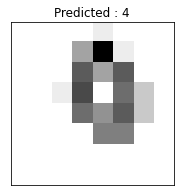

In [50]:
plt.figure(figsize=(3,3))
plt.imshow(pixel, cmap='gray_r')
plt.title('Predicted : {}'.format(predicted[0]))

# plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

# Multiple file prediction

In [73]:
def predict_digit(img_path):
    img = Image.open(img_path).convert('L')
    img = ImageOps.invert(img)
    img = img.resize((8,8), resample=Image.ANTIALIAS)
    
    
    pixel = np.array(img)
    pixel = pixel / 255.0  * 16 # rescale 0-255 => 0-16
    pixel = pixel.astype('int') # round(0)
    # plt.imshow(pixel)
    
    my_digit = pixel.reshape(1, -1)
    predicted = model.predict(my_digit)
    
    plt.figure(figsize=(2,2))
    plt.imshow(pixel, cmap='gray_r')
    plt.title('Predicted : {}'.format(predicted[0]), fontsize=20)

    plt.xticks([])
    plt.yticks([])
    plt.show()

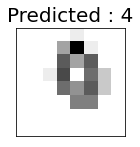

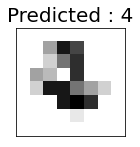

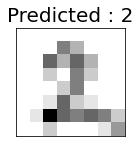

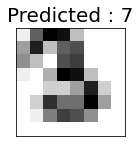

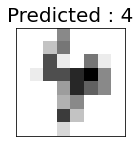

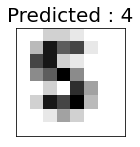

In [75]:
img_names = [ f'digit{i}.png' for i in range(6)]
# path = '../../../Samples/my-hand-digits/digit0.png'
for f_path in img_names:
    prefix = '../../../Samples/my-hand-digits/'
    predict_digit(prefix + str(f_path))